In [320]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import EarlyStopping
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random
import datetime as dt
from sklearn.model_selection import train_test_split
from collections import deque

In [321]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings(action='once')
import xlrd
import openpyxl
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

ERROR! Session/line number was not unique in database. History logging moved to new session 801


In [322]:
physical_device = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_device[0], True)
except:
    print("error")

In [323]:
df = pd.read_excel(("results_2021_cefas_website.xlsx"), sheet_name = 1, engine='openpyxl')
df

,Phytoplankton Monitoring Programme results,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Sample number,Production area,Bed ID,Local authority,Grid reference,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessot...,Prorocentrum cordatum \ncells L-1\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,2021-01-04 11:00:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,2021-01-04 08:30:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,2021-01-05 10:30:00,ND,ND,ND,400,ND,ND,ND,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,2021-01-05 11:00:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,Alexandrium spp. (PSP) - 40 cells/litre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
944,Dinophysiaceae/Prorocentrum lima (DSP) - 100 c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
945,"Pseudo-nitzschia spp. (ASP) - 150,000 cells/litre",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
946,Phytoplankton cell count ≥ trigger Level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [324]:
header = df.iloc[0] #grab the first row for the header
header

Phytoplankton Monitoring Programme results                                        Sample number
Unnamed: 1                                                                      Production area
Unnamed: 2                                                                               Bed ID
Unnamed: 3                                                                      Local authority
Unnamed: 4                                                           Grid reference            
Unnamed: 5                                                                       Sampling point
Unnamed: 6                                                                Date sample collected
Unnamed: 7                                                  Alexandrium spp. \ncells L-1\n(PSP)
Unnamed: 8                                                    Dinophysiaceae \ncells L-1\n(DSP)
Unnamed: 9                                                 Prorocentrum lima \ncells L-1\n(DSP)
Unnamed: 10                             

In [325]:
df.columns = header #set the header row as the df header
df = df.loc[1:936]
df

,Sample number,Production area,Bed ID,Local authority,Grid reference,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,2021-01-04 11:00:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,2021-01-04 08:30:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,2021-01-05 10:30:00,ND,ND,ND,400,ND,ND,ND,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,2021-01-05 11:00:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
5,5/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,2021-01-06 10:30:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,966/21,Blackwater,B014V,Maldon DC,TL91160795,Goldhanger,2021-12-14 11:35:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
933,967/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,2021-12-14 08:30:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
934,968/21,Holy Island-Ross Links,B001M,Northumberland CC,NU12333958,Ross Links,2021-12-14 08:00:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
935,969/21,Brixham,B082B,Torbay BC,SX90965741,Fishcombe SW Corner,2021-12-14 16:00:00,"Not tested, submitted outside of routine testi...","Not tested, submitted outside of routine testi...","Not tested, submitted outside of routine testi...","Not tested, submitted outside of routine testi...","Not tested, submitted outside of routine testi...","Not tested, submitted outside of routine testi...","Not tested, submitted outside of routine testi...",NaN,NaN


In [326]:
print(df['Alexandrium spp. \ncells L-1\n(PSP)'].unique())
df.drop(index=df[df['Alexandrium spp. \ncells L-1\n(PSP)'] == 'Unable to analyse, too much sediment'].index, inplace=True)
df.drop(index=df[df['Alexandrium spp. \ncells L-1\n(PSP)'] == 'NOT TESTED, SUBMITTED IN ERROR'].index, inplace=True)
df.drop(index=df[df['Alexandrium spp. \ncells L-1\n(PSP)'] == 'Not tested, submitted outside of routine testing frequency'].index, inplace=True)
print(df['Alexandrium spp. \ncells L-1\n(PSP)'].unique())

['ND' 'Unable to analyse, too much sediment' 200 40 100 120 80 320 400 500
 'NOT TESTED, SUBMITTED IN ERROR' 160 240
 'Not tested, submitted outside of routine testing frequency']
['ND' 200 40 100 120 80 320 400 500 160 240]


C:\Users\hp\anaconda3\envs\keji\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [327]:
df['Dinophysiaceae \ncells L-1\n(DSP)'].unique()

array(['ND', 40, 80, 160, 520, 240, 320, 200, 280, 400, 120, 800, 1360,
       720, 640, 680, 1880, 100, 2960, 1400, 480, 1320, 1000, 760],
      dtype=object)

In [328]:
df['Prorocentrum lima \ncells L-1\n(DSP)'].unique()

array(['ND', 100, 40, 200, 120, 400, 18520, 17480, 6160, 80], dtype=object)

In [329]:
df

,Sample number,Production area,Bed ID,Local authority,Grid reference,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,2021-01-04 11:00:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,2021-01-04 08:30:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,2021-01-05 10:30:00,ND,ND,ND,400,ND,ND,ND,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,2021-01-05 11:00:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
5,5/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,2021-01-06 10:30:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,964/21,Portland,B25AK,Dorset Council,SY68707757,Site A,2021-12-14 10:22:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
931,965/21,Dee,B45AB,Flintshire CC,SJ17568056,Salisbury,2021-12-14 07:00:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
932,966/21,Blackwater,B014V,Maldon DC,TL91160795,Goldhanger,2021-12-14 11:35:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
933,967/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,2021-12-14 08:30:00,ND,ND,ND,ND,ND,ND,ND,NaN,NaN


In [330]:
df.drop(df.columns[11:], axis=1, inplace=True)
df.drop(df.columns[0:7], axis=1, inplace=True)

C:\Users\hp\anaconda3\envs\keji\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [331]:
df

,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP)
1,ND,ND,ND,ND
2,ND,ND,ND,ND
3,ND,ND,ND,400
4,ND,ND,ND,ND
5,ND,ND,ND,ND
...,...,...,...,...
930,ND,ND,ND,ND
931,ND,ND,ND,ND
932,ND,ND,ND,ND
933,ND,ND,ND,ND


In [332]:
df.to_csv('component1_updated.csv', index=False)
print('Cleaned csv data has been created successfully')

Cleaned csv data has been created successfully


In [333]:
updated_df = pd.read_csv('component1_updated.csv')
updated_df

,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP)
0,ND,ND,ND,ND
1,ND,ND,ND,ND
2,ND,ND,ND,400
3,ND,ND,ND,ND
4,ND,ND,ND,ND
...,...,...,...,...
904,ND,ND,ND,ND
905,ND,ND,ND,ND
906,ND,ND,ND,ND
907,ND,ND,ND,ND


In [334]:
updated_df.shape

(909, 4)

In [335]:
def clean_data(df):
    df["Alexandrium spp. \ncells L-1\n(PSP)"] = df["Alexandrium spp. \ncells L-1\n(PSP)"].replace("ND", 0)
    df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].replace("ND", 0)
    df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].replace("ND", 0)
    df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].replace("ND", 0)
    df["Alexandrium spp. \ncells L-1\n(PSP)"] = pd.to_numeric(df["Alexandrium spp. \ncells L-1\n(PSP)"], errors='coerce')
    df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = pd.to_numeric(df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "], errors='coerce')
    df["Dinophysiaceae \ncells L-1\n(DSP)"] = pd.to_numeric(df["Dinophysiaceae \ncells L-1\n(DSP)"], errors='coerce')
    df["Prorocentrum lima \ncells L-1\n(DSP)"] = pd.to_numeric(df["Prorocentrum lima \ncells L-1\n(DSP)"], errors='coerce')
    df["Alexandrium spp. \ncells L-1\n(PSP)"] = df["Alexandrium spp. \ncells L-1\n(PSP)"].fillna(-1)
    df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].fillna(-1)
    df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].fillna(-1)
    df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].fillna(-1)
        
clean_data(updated_df)

In [336]:
def nan_value(df):
    df["Alexandrium spp. \ncells L-1\n(PSP)"] = df["Alexandrium spp. \ncells L-1\n(PSP)"].fillna(-1)
    df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].fillna(-1)
    df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].fillna(-1)
    df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].fillna(-1)
nan_value(updated_df)

In [337]:
updated_df

,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP)
0,0,0,0,0
1,0,0,0,0
2,0,0,0,400
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
904,0,0,0,0
905,0,0,0,0
906,0,0,0,0
907,0,0,0,0


In [338]:
thresholds = {"Alexandrium spp. \ncells L-1\n(PSP)" : 40, "Dinophysiaceae \ncells L-1\n(DSP)" : 100, "Prorocentrum lima \ncells L-1\n(DSP)" : 100, "Pseudo-nitzschia spp. \ncells L-1\n(ASP) " : 150000}

In [339]:
def check_thresholds(df):
    t = []
    for i,j in enumerate(df["Alexandrium spp. \ncells L-1\n(PSP)"]):
        alexandrium = df.iloc[i]["Alexandrium spp. \ncells L-1\n(PSP)"]
        pseudo_nitzschia = df.iloc[i]["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]
        dinophysiaceae = df.iloc[i]["Dinophysiaceae \ncells L-1\n(DSP)"]
        prorocentrum = df.iloc[i]["Prorocentrum lima \ncells L-1\n(DSP)"]
        threshold_reached = 0
        if pseudo_nitzschia >= thresholds["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]:
            threshold_reached = 1
        elif dinophysiaceae >= thresholds["Dinophysiaceae \ncells L-1\n(DSP)"]:
            threshold_reached = 1
        elif prorocentrum >= thresholds["Prorocentrum lima \ncells L-1\n(DSP)"]:
            threshold_reached = 1
        elif alexandrium >= thresholds["Alexandrium spp. \ncells L-1\n(PSP)"]:
            threshold_reached = 1
        t.append(threshold_reached)
    return t

In [446]:
thresholds_reached = check_thresholds(updated_df)
updated_df['thresholds_reached'] = thresholds_reached
updated_df

,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),thresholds_reached
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,400,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
904,0,0,0,0,0
905,0,0,0,0,0
906,0,0,0,0,0
907,0,0,0,0,0


In [373]:
pd.DataFrame.to_csv(updated_df, 'thresholds_cleaned_final.csv', sep=',', index=False)

In [447]:
a = pd.read_csv('thresholds_cleaned_final.csv', usecols=["Pseudo-nitzschia spp. \ncells L-1\n(ASP) ",'Dinophysiaceae \ncells L-1\n(DSP)', "Prorocentrum lima \ncells L-1\n(DSP)", "Alexandrium spp. \ncells L-1\n(PSP)"], na_values = ['no info', '.'])
b = pd.read_csv('thresholds_cleaned_final.csv', usecols=["thresholds_reached"])

In [448]:
b = to_categorical(b)
print(b[1])

[1. 0.]


In [459]:
x_train, x_test, y_train, y_test = train_test_split(a, b, test_size = 0.30, shuffle = True, random_state = 10)

In [460]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape )

(636, 4) (273, 4) (636, 2) (273, 2)


In [462]:
model = Sequential()
model.add(layers.Dense(units=1000, activation='relu', input_shape=(4,)))
model.add(layers.Dropout(0.9))
model.add(layers.Dense(units=5, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='relu'))

In [463]:
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 1000)              5000      
_________________________________________________________________
dropout_31 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 5)                 5005      
_________________________________________________________________
dropout_32 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 12        
Total params: 10,017
Trainable params: 10,017
Non-trainable params: 0
_________________________________________________________________
None



# First accuracy with learning rate of 0.01

In [1]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=optimizer,metrics=['accuracy'])

NameError: name 'keras' is not defined

In [ ]:
history1 = model.fit(x_train, y_train,batch_size=16,epochs=10,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


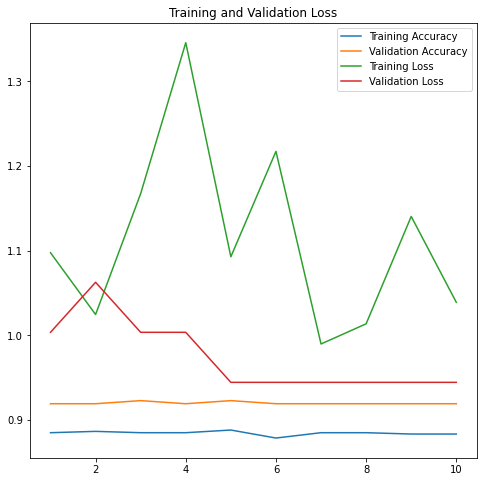

In [475]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs_range = range(1, len(loss) + 1)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()


# Second Accuracy with learning rate of 0.001

In [487]:
model2 = Sequential()
model2.add(layers.Dense(units=1000, activation='relu', input_shape=(4,)))
model2.add(layers.Dropout(0.9))
model2.add(layers.Dense(units=5, activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(2, activation='relu'))

In [488]:
print(model2.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 1000)              5000      
_________________________________________________________________
dropout_43 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 5)                 5005      
_________________________________________________________________
dropout_44 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_62 (Dense)             (None, 2)                 12        
Total params: 10,017
Trainable params: 10,017
Non-trainable params: 0
_________________________________________________________________
None


In [489]:
optimizer = keras.optimizers.Adam(lr=0.001)
model2.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [491]:
history2 = model2.fit(x_train, y_train,batch_size=16,epochs=10,verbose=1,validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 636 samples, validate on 273 samples
Epoch 1/10
636/636 [==============================] - 9s 14ms/sample - loss: 1.0276 - accuracy: 0.8994 - val_loss: 0.8572 - val_accuracy: 0.9304
Epoch 2/10
636/636 [==============================] - 4s 6ms/sample - loss: 1.0267 - accuracy: 0.8836 - val_loss: 0.7540 - val_accuracy: 0.9267
Epoch 3/10
636/636 [==============================] - 4s 7ms/sample - loss: 0.8722 - accuracy: 0.8978 - val_loss: 0.2218 - val_accuracy: 0.9267
Epoch 4/10
636/636 [==============================] - 4s 6ms/sample - loss: 0.6291 - accuracy: 0.9025 - val_loss: 0.2091 - val_accuracy: 0.9267
Epoch 5/10
636/636 [==============================] - 4s 6ms/sample - loss: 0.8376 - accuracy: 0.8978 - val_loss: 0.1845 - val_accuracy: 0.9304
Epoch 6/10
636/636 [==============================] - 4s 7ms/sample - loss: 0.5881 - accuracy: 0.8978 - val_loss: 0.5490 - val_accuracy: 0.9267
Epoch 7/10
636/636 [==============================] - 4s 6ms/sample - loss: 0.8742 - accu

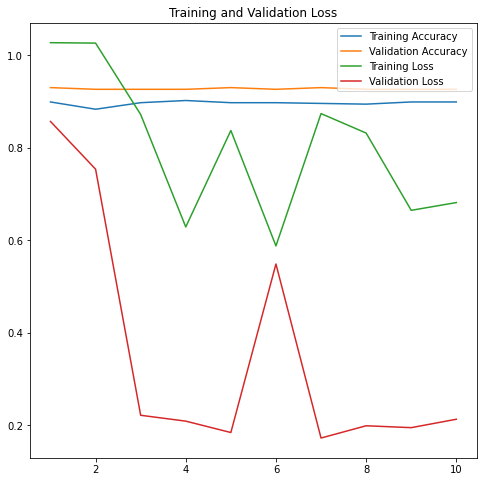

In [492]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs_range = range(1, len(loss) + 1)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()


# Third Accuracy with  Four fully connected layer(Dense)

In [493]:
model3 = Sequential()
model3.add(layers.Dense(units=1000, activation='relu', input_shape=(4,)))
model3.add(layers.Dropout(0.9))
model3.add(layers.Dense(units=64, activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(units=5, activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(2, activation='relu'))

In [494]:
print(model3.summary())

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 1000)              5000      
_________________________________________________________________
dropout_45 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_64 (Dense)             (None, 64)                64064     
_________________________________________________________________
dropout_46 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 5)                 325       
_________________________________________________________________
dropout_47 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_66 (Dense)             (None, 2)               

In [495]:
optimizer = keras.optimizers.Adam(lr=0.01)
model3.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [496]:
history3 = model3.fit(x_train, y_train,batch_size=16,epochs=10,verbose=1,validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


C:\Users\hp\anaconda3\envs\keji\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


Train on 636 samples, validate on 273 samples
Epoch 1/10
636/636 [==============================] - 13s 21ms/sample - loss: 0.9637 - accuracy: 0.8396 - val_loss: 1.1921e-07 - val_accuracy: 0.9194
Epoch 2/10
636/636 [==============================] - 4s 6ms/sample - loss: 0.8477 - accuracy: 0.8664 - val_loss: 0.1181 - val_accuracy: 0.9194
Epoch 3/10
636/636 [==============================] - 4s 7ms/sample - loss: 0.5840 - accuracy: 0.8868 - val_loss: 0.1181 - val_accuracy: 0.9194
Epoch 4/10
636/636 [==============================] - 4s 6ms/sample - loss: 0.7655 - accuracy: 0.8821 - val_loss: 0.1181 - val_accuracy: 0.9194
Epoch 5/10
636/636 [==============================] - 4s 7ms/sample - loss: 0.8110 - accuracy: 0.8836 - val_loss: 0.1181 - val_accuracy: 0.9194
Epoch 6/10
636/636 [==============================] - 4s 6ms/sample - loss: 0.7349 - accuracy: 0.8836 - val_loss: 0.1181 - val_accuracy: 0.9194
Epoch 7/10
636/636 [==============================] - 4s 7ms/sample - loss: 0.7349 -

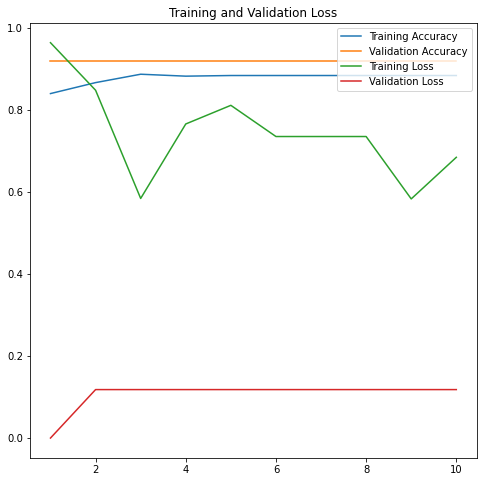

In [497]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs_range = range(1, len(loss) + 1)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()


# Second Model of 5 layers

In [498]:
model4 = Sequential()
model4.add(layers.Dense(units=1000, activation='relu', input_shape=(4,)))
model4.add(layers.Dropout(0.9))
model4.add(layers.Dense(units=500, activation='relu'))
model4.add(layers.Dropout(0.2))
model4.add(layers.Dense(units=64, activation='relu'))
model4.add(layers.Dropout(0.2))
model4.add(layers.Dense(units=5, activation='relu'))
model4.add(layers.Dropout(0.2))
model4.add(layers.Dense(2, activation='relu'))


In [499]:
print(model4.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 1000)              5000      
_________________________________________________________________
dropout_48 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_68 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_49 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 64)                32064     
_________________________________________________________________
dropout_50 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 5)               

In [500]:
model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\hp\anaconda3\envs\keji\lib\site-packages\tensorflow_core\python\framework\tensor_util.py:523: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


Train on 636 samples, validate on 273 samples
Epoch 1/10
636/636 [==============================] - 8s 12ms/sample - loss: 0.7400 - accuracy: 0.9041 - val_loss: 0.9694 - val_accuracy: 0.9267
Epoch 2/10
636/636 [==============================] - 5s 8ms/sample - loss: 0.9256 - accuracy: 0.9088 - val_loss: 0.9694 - val_accuracy: 0.9267
Epoch 3/10
636/636 [==============================] - 4s 7ms/sample - loss: 0.8970 - accuracy: 0.9072 - val_loss: 0.9693 - val_accuracy: 0.9267
Epoch 4/10
636/636 [==============================] - 4s 6ms/sample - loss: 0.9674 - accuracy: 0.9104 - val_loss: 0.9694 - val_accuracy: 0.9267
Epoch 5/10
636/636 [==============================] - 4s 6ms/sample - loss: 1.0698 - accuracy: 0.8994 - val_loss: 0.9694 - val_accuracy: 0.9267
Epoch 6/10
636/636 [==============================] - 5s 8ms/sample - loss: 1.0343 - accuracy: 0.9088 - val_loss: 0.9693 - val_accuracy: 0.9267
Epoch 7/10
636/636 [==============================] - 5s 7ms/sample - loss: 0.5882 - accu

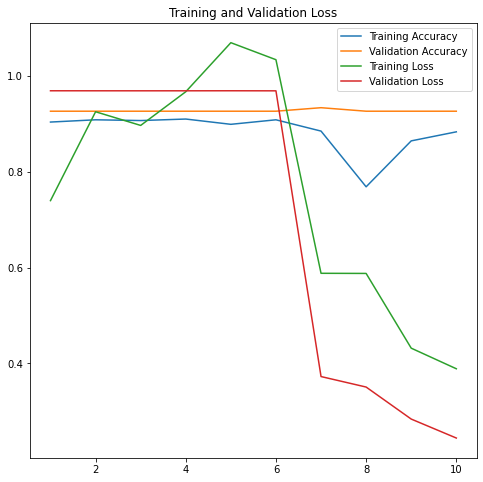

In [502]:
history4 = model4.fit(x_train, y_train,batch_size=16,epochs=10,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs_range = range(1, len(loss) + 1)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()